# Importing Libraries

In [123]:
import pandas as pd               #For data processing
import numpy as np                #For numerical processing(array)
import seaborn as sns             #For visualization

# Importing Dataset

In [7]:
data=pd.read_csv("C:/Users/RAJU/Downloads/hepatitis_csv.csv")

# Descriptive analysis

In [8]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [9]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


From the fluctuations in 'COUNT' values for all the numerical columns,we can know that there is missing values.

In [11]:
data.shape

(155, 20)

In [70]:
col=data.columns
col

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

columns like AGE,SEX,ANTIVIRALS,HISTOLOGY,CLASS has no missing values.

In [13]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

some of the columns has these numbers of missing value counts.

# Missing value treatment

In [44]:
data.fillna(method='bfill',axis=0,inplace=True)

since most of the columns are categorical, we are using backwardfill here.

In [45]:
data.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

Here we have no missing values after treatment.

# Encoding Categorical variables

In [125]:
category=['sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','histology','class']

By using Label Encoder, we are encoding the variables with 0 and 1.

In [53]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in category:
    data[i]=label.fit_transform(data[i])


male=1, female=0

true=1 , false=0

live=1, die=0

In [54]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,7,33,3,16,39,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,6,57,19,11,39,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,4,39,13,16,39,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,4,6,26,16,39,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,7,6,71,16,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,32,50,76,9,18,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,6,53,59,19,18,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,5,26,5,17,18,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,12,30,4,17,17,1,1


# Visualization

In [56]:
import seaborn as sns

# HISTOGRAM:-

Large number of people are alive.

<AxesSubplot:xlabel='class', ylabel='Count'>

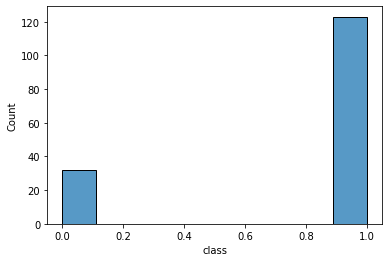

In [93]:
sns.histplot(x=data['class'])

# BOXPLOT:-
    
    AGE column have only one outlier.
    
    BILIRUBIN column have 5 outliers.

<AxesSubplot:xlabel='age'>

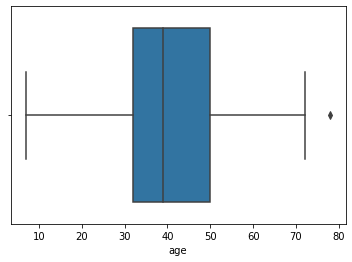

In [83]:
sns.boxplot(x=data['age'])


<AxesSubplot:xlabel='bilirubin'>

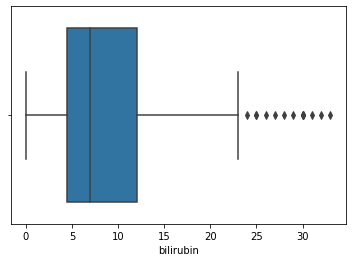

In [84]:
sns.boxplot(x=data['bilirubin'])


# PAIRPLOT:-
    
    AGE and ALBUMIN columns have NORMAL DISTRIBUTION.
    BILIRUBIN,SGOT columns are positively skewed.
    PROTIME is negatively skewed.
    

all other colums has scattered random distribution.

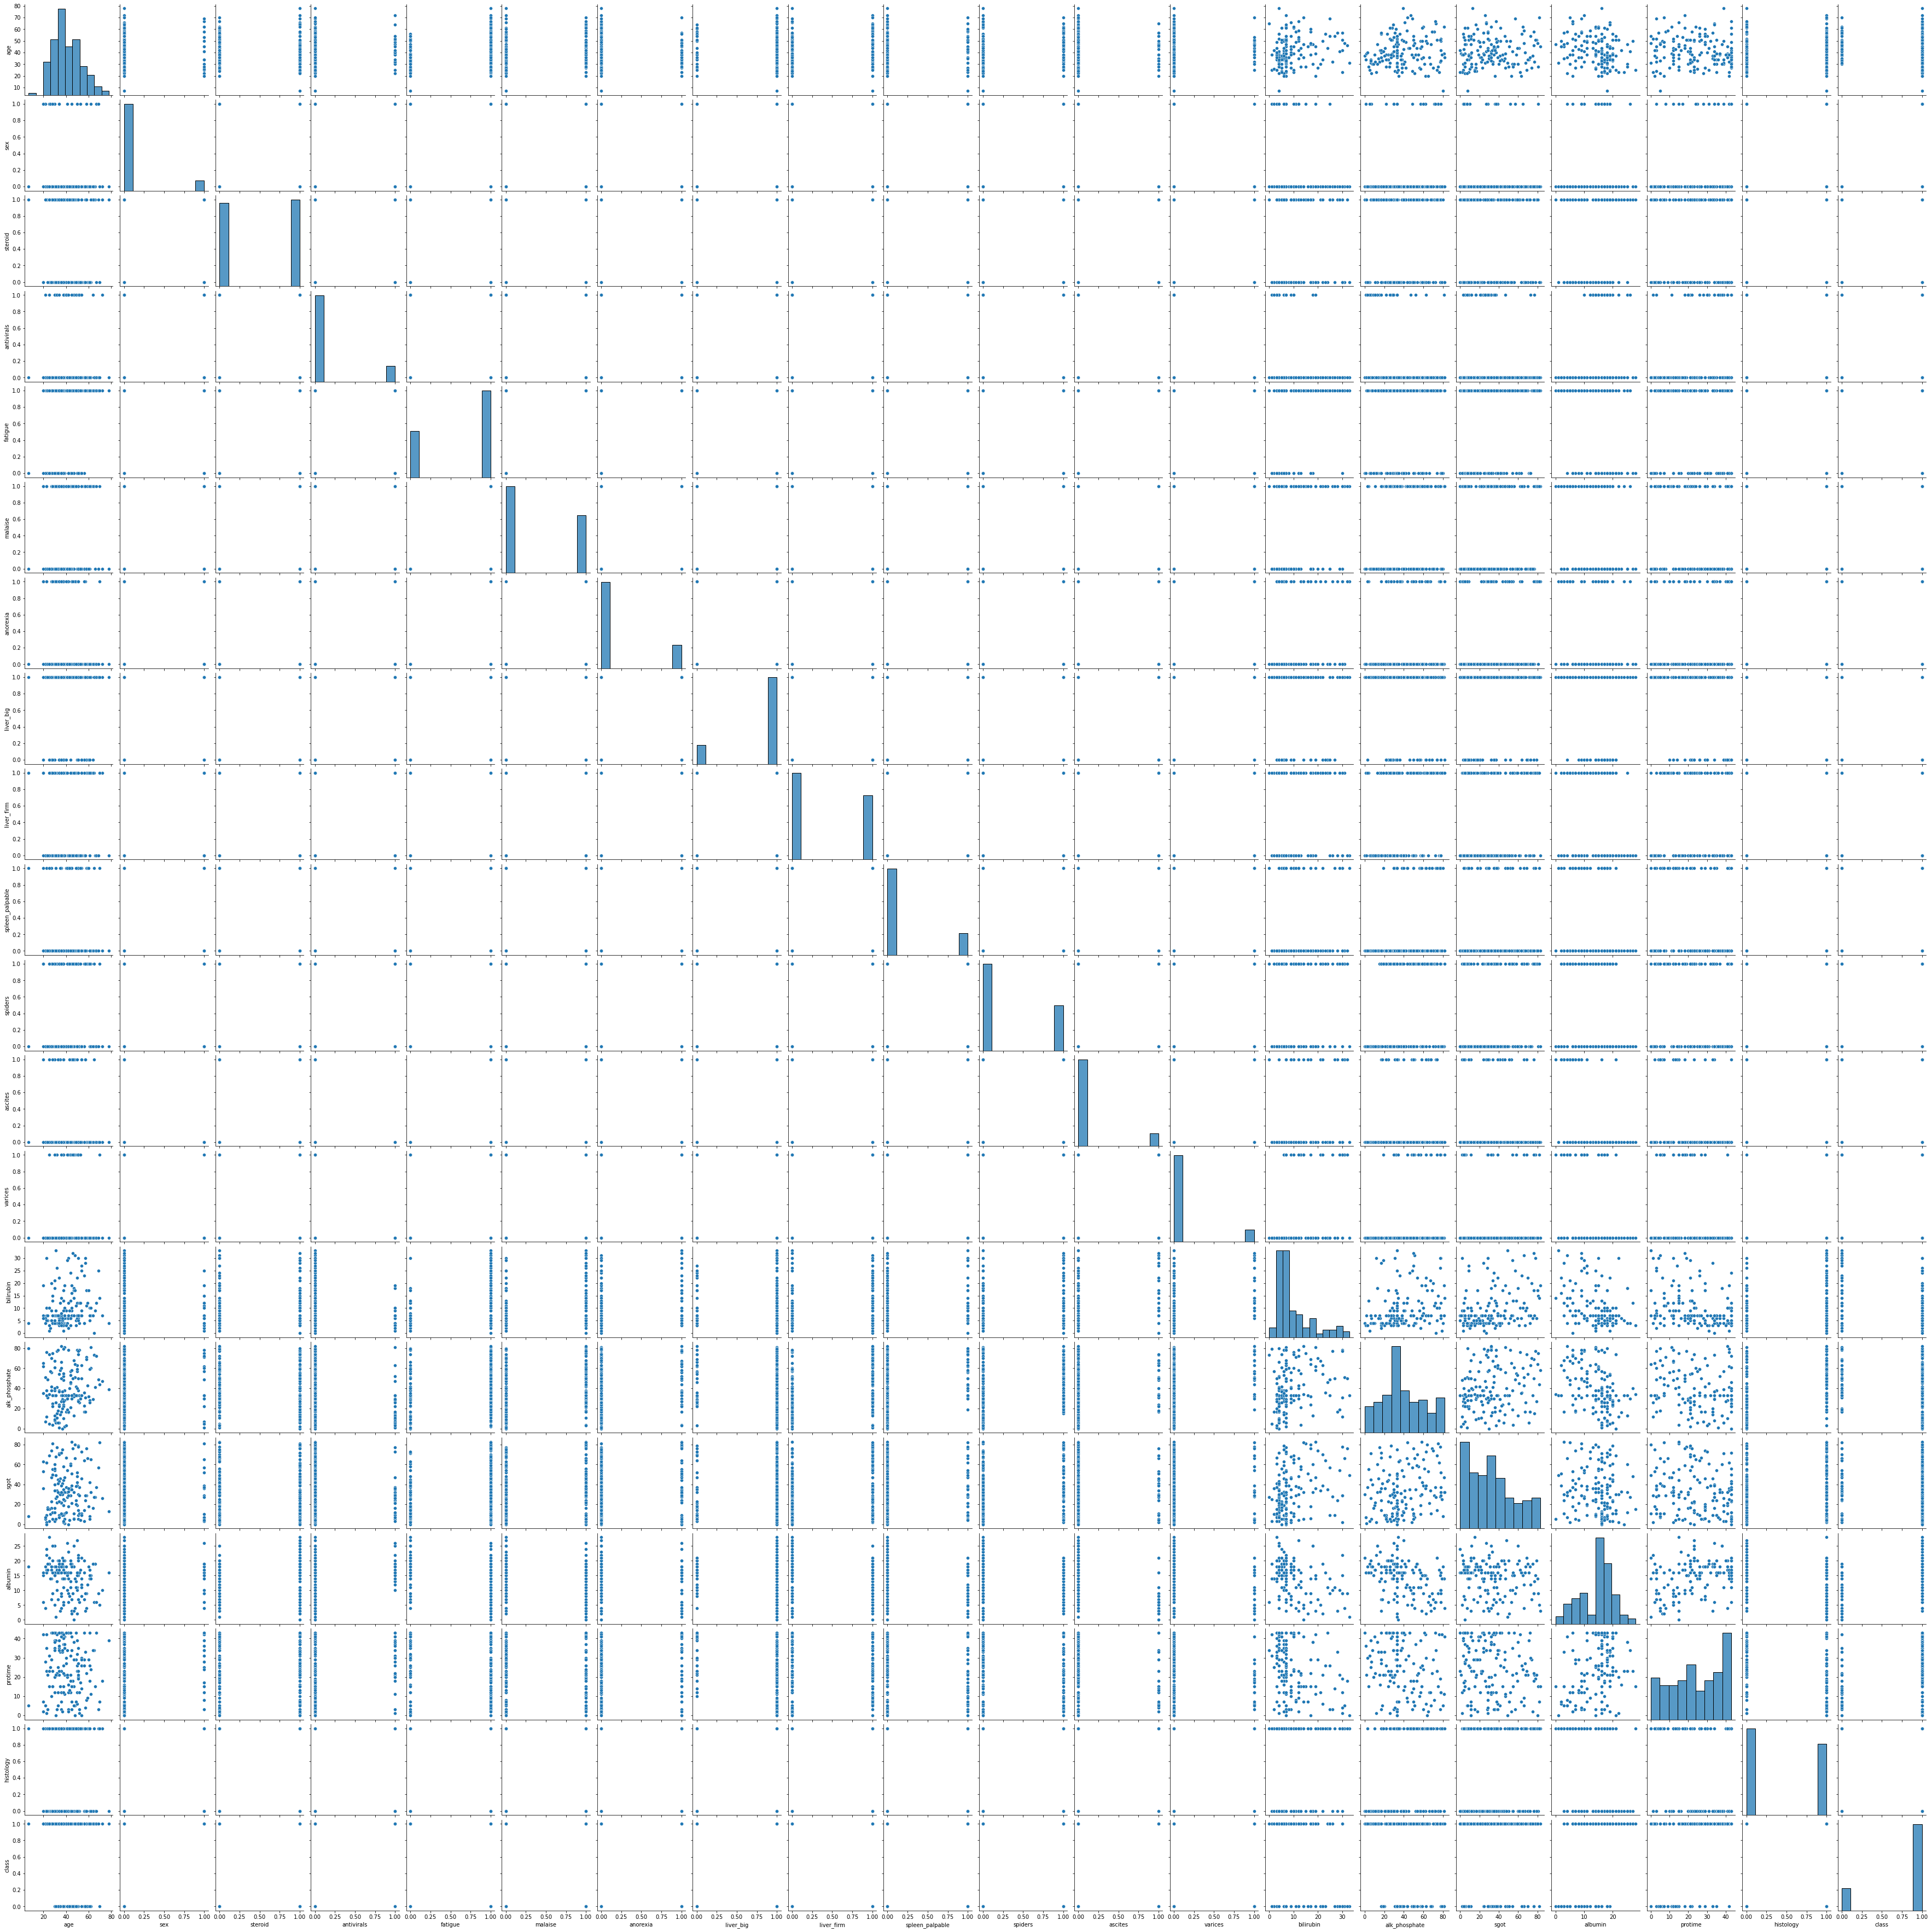

In [87]:
sns.pairplot(data)

# HEATMAP:-


<AxesSubplot:>

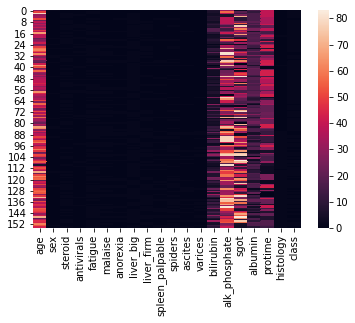

In [128]:
sns.heatmap(data)

# COUNTPLOT:-

counts for sex and class counts.


<AxesSubplot:xlabel='sex', ylabel='count'>

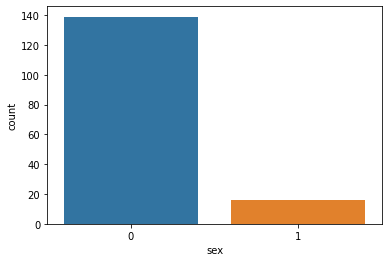

In [117]:
sns.countplot(x=data['sex'])

<AxesSubplot:xlabel='class', ylabel='count'>

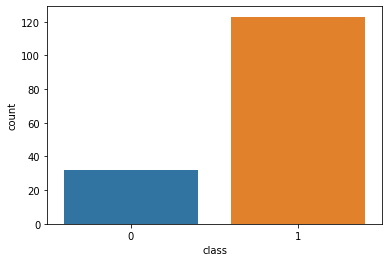

In [119]:
sns.countplot(x=data['class'])

comparing counts of sex and class(live or die)

<AxesSubplot:xlabel='class', ylabel='count'>

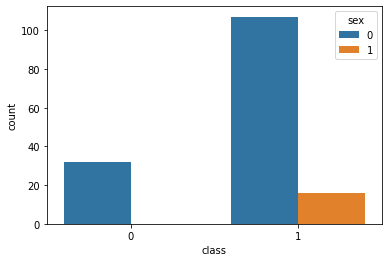

In [124]:
sns.countplot(x=data['class'],hue=data['sex'])

# Dependent and independent variables

In [131]:
dep_var=data.iloc[:,-1].values
dep_var

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0], dtype=int64)

In [132]:
indep_var=data.iloc[:,:-1].values
indep_var

array([[30,  1,  0, ..., 16, 39,  0],
       [50,  0,  0, ..., 11, 39,  0],
       [78,  0,  1, ..., 16, 39,  0],
       ...,
       [61,  0,  0, ..., 17, 18,  1],
       [53,  1,  0, ..., 17, 17,  1],
       [43,  0,  1, ...,  8, 13,  1]], dtype=int64)